# Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectPercentile, f_classif, VarianceThreshold
import joblib

# Loading the dataset

In [2]:
df = pd.read_csv('parkinsons.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## Understanding and examining the structure and organization of dataset

In [3]:
df.shape

(195, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

## Eliminating the unnecessary columns

In [5]:
df.drop('name',axis=1,inplace=True)

In [6]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [7]:
df.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [8]:
df[df.duplicated()]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


<AxesSubplot:xlabel='status', ylabel='count'>

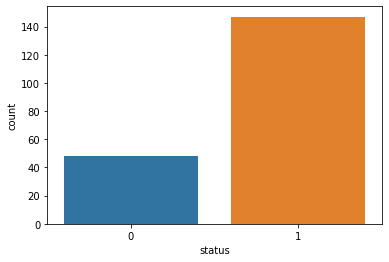

In [9]:
sns.countplot(df['status'])

The target label 'status' is highly imbalanced so we need to balance it out.

<AxesSubplot:>

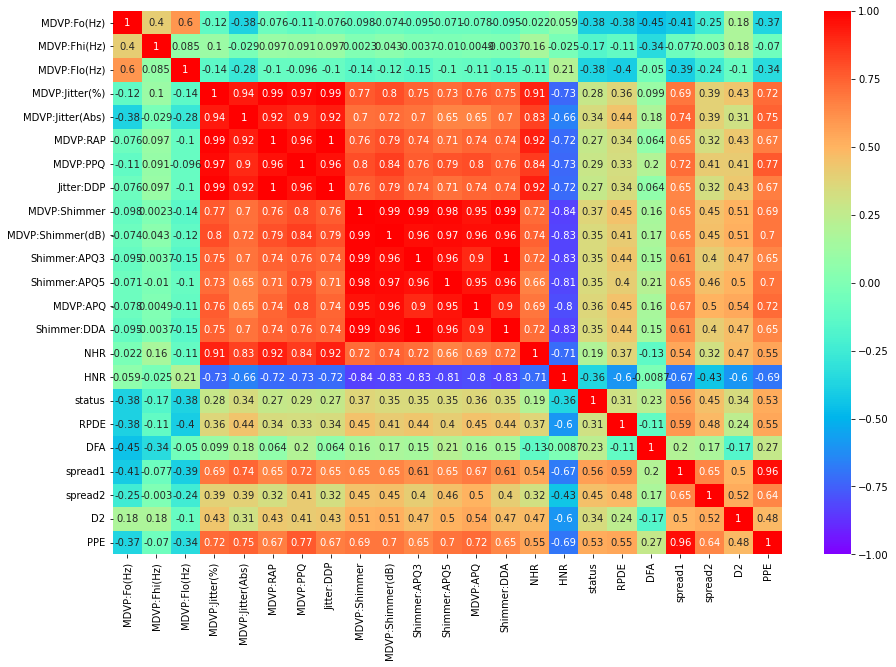

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap='rainbow')

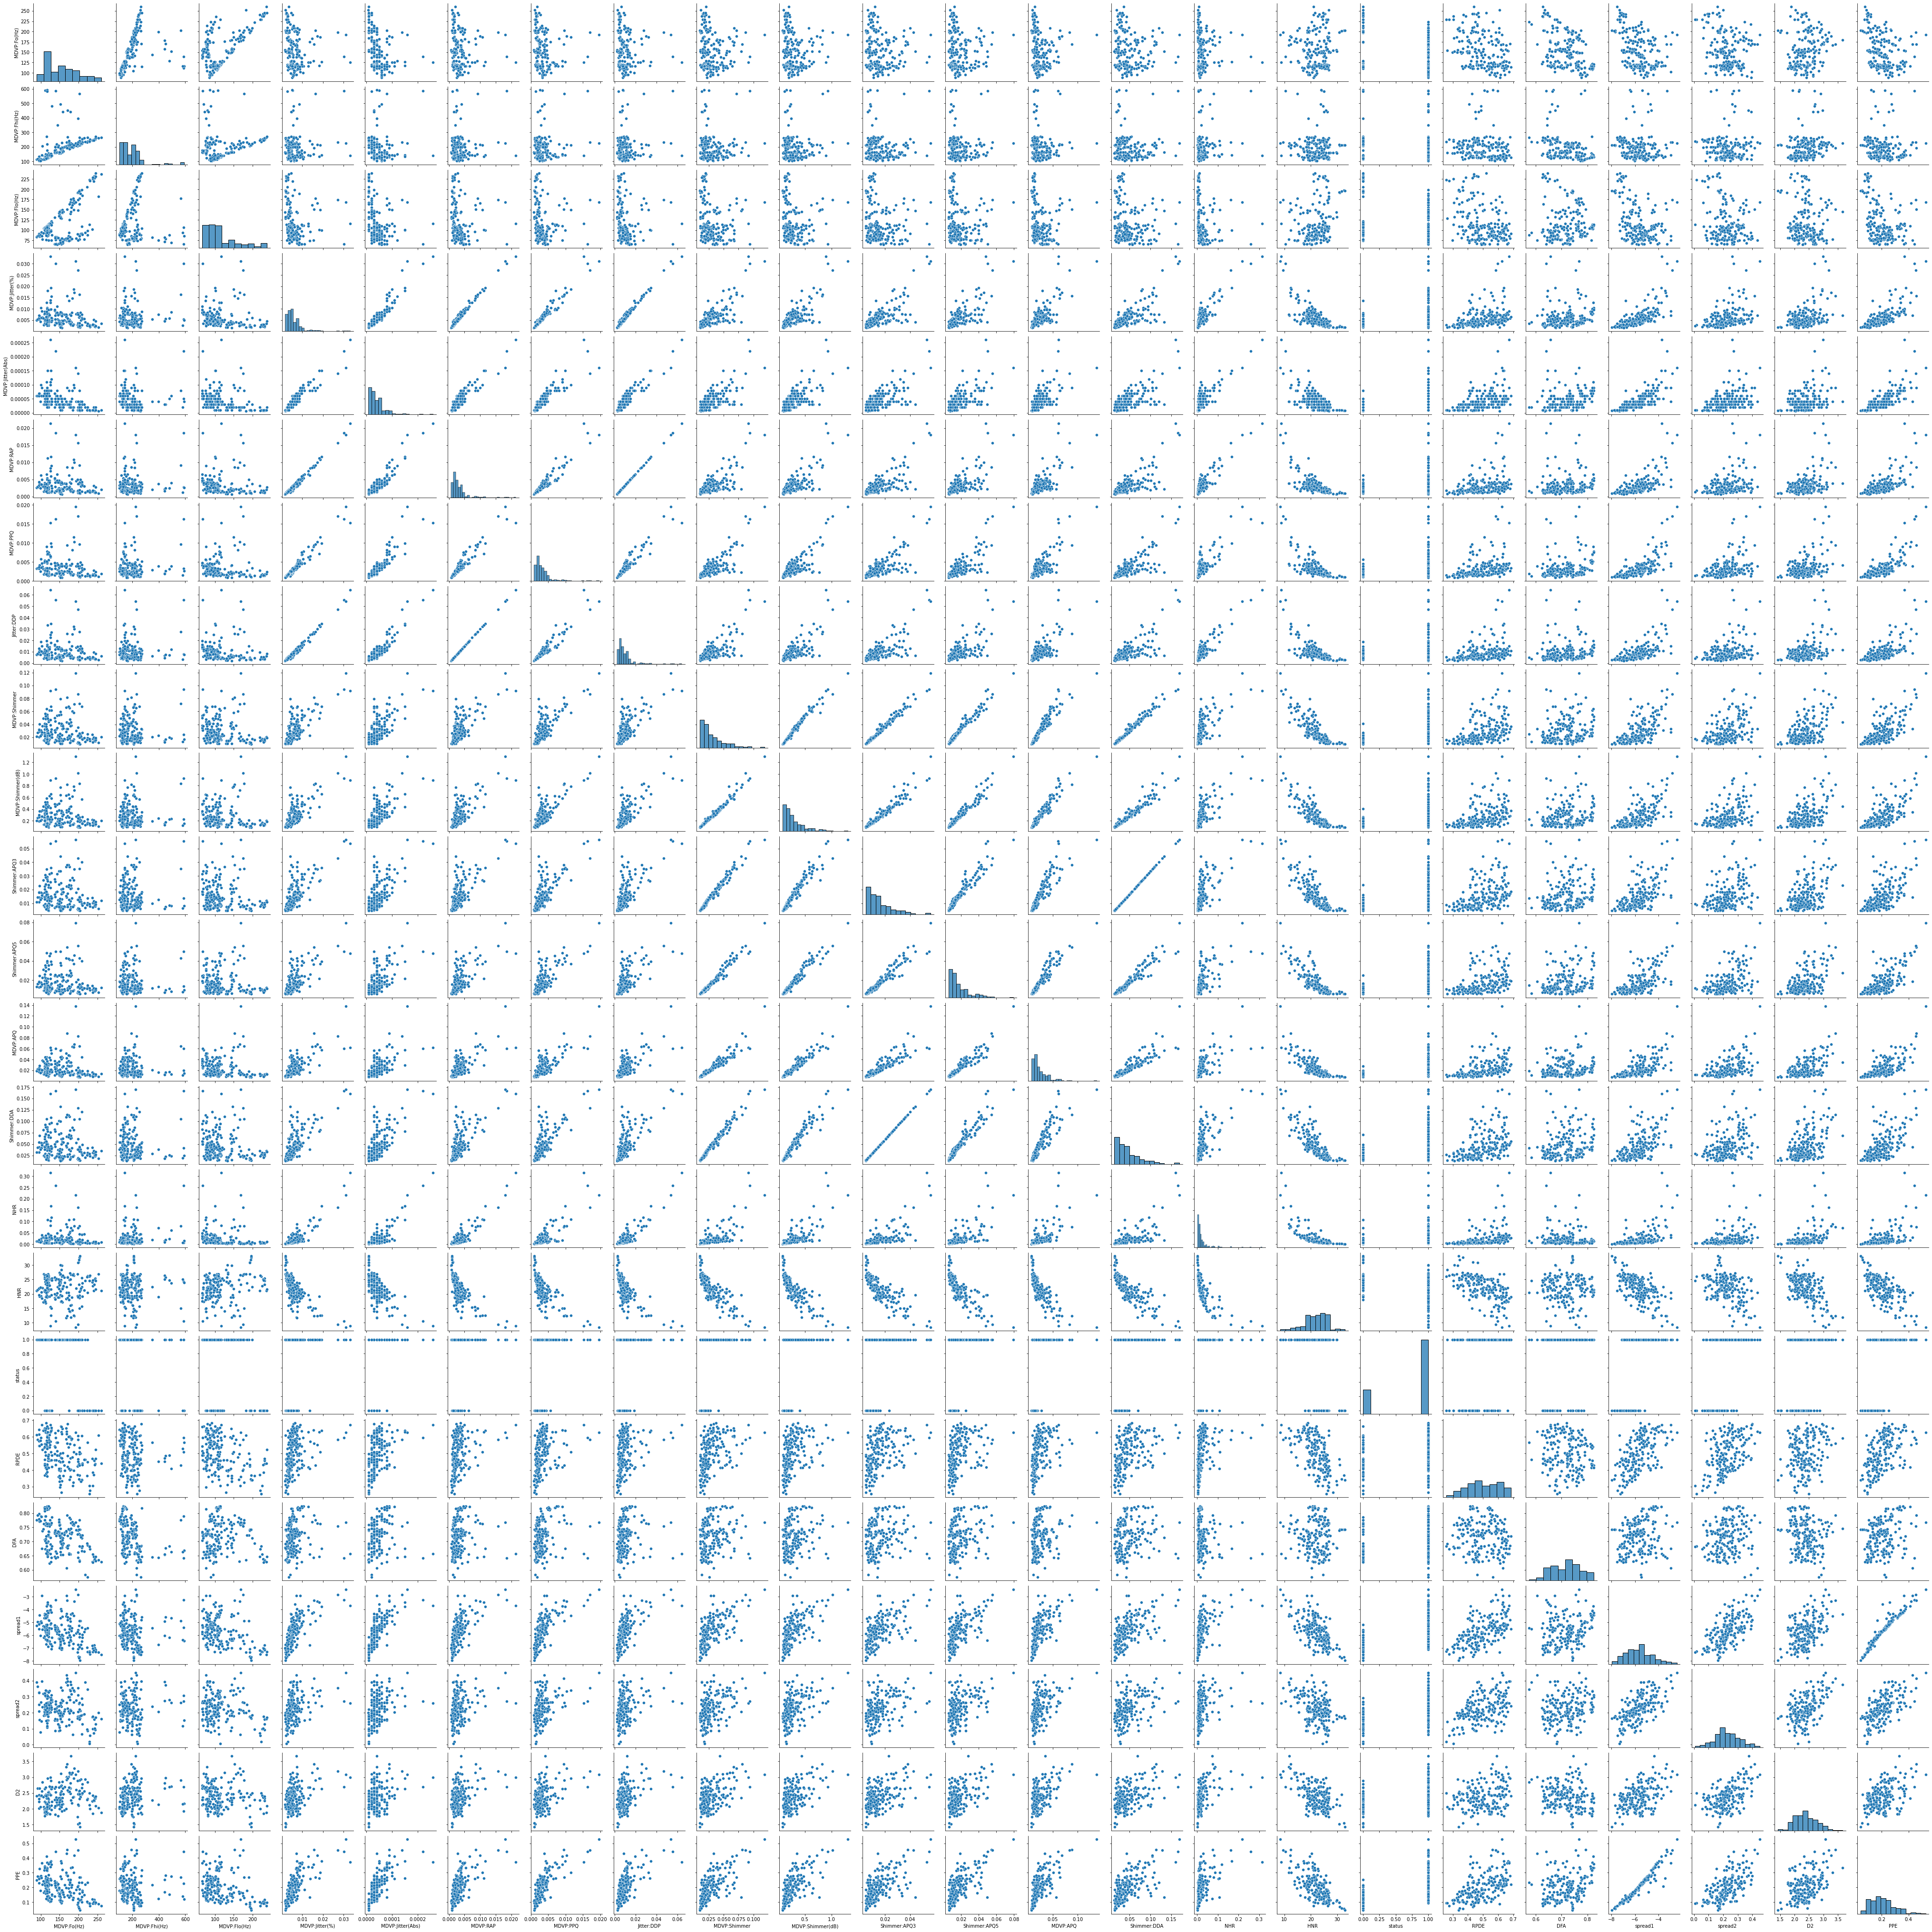

In [11]:
sns.pairplot(df)

# Resampling the dataset using Synthetic Minority Oversampling Technique(SMOTE)

In [12]:
X = df.drop('status',axis=1)
y = df['status']

In [13]:
sm = SMOTE(k_neighbors=10)
X,y = sm.fit_resample(X,y)

<AxesSubplot:xlabel='status', ylabel='count'>

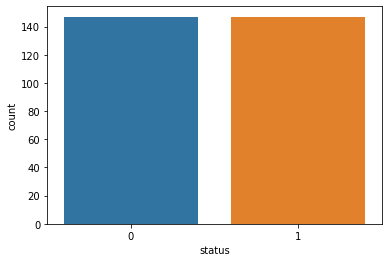

In [14]:
sns.countplot(y)

# Feature Selection

Let's look for constant features

In [15]:
sel = VarianceThreshold(threshold=0)
sel.fit(X,y)

VarianceThreshold(threshold=0)

In [16]:
sum(sel.get_support())

22

In [17]:
# Printing the total number of constant features
print(len([x for x in X.columns if x not in X.columns[sel.get_support()]]))
[x for x in X.columns if x not in X.columns[sel.get_support()]]

0


[]

There are no features with constant variance.

### Selecting the features in the top 20 percentile

In [18]:
percentile = SelectPercentile(f_classif,percentile=20)
percentile.fit(X,y)

SelectPercentile(percentile=20)

Text(0.5, 1.0, 'Feature Importances')

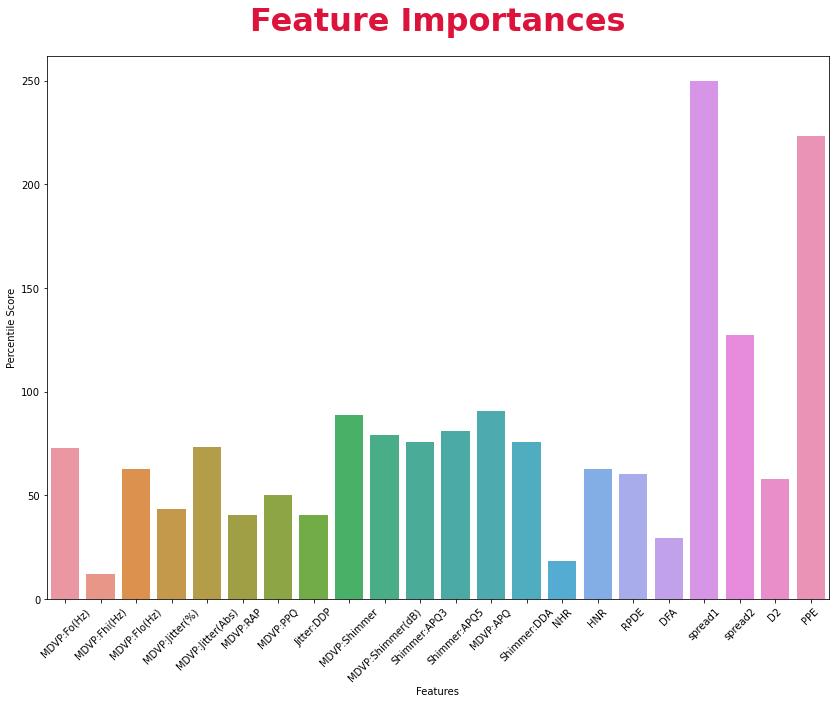

In [19]:
plt.figure(figsize=(14,10))
sns.barplot(X.columns,percentile.scores_)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Percentile Score')
plt.title('Feature Importances',fontsize=32,color='crimson',fontweight='bold',pad=25)

'Spread1' and 'PPE' are the most important predictor variables in the entire dataset.

In [20]:
sum(percentile.get_support())

5

In [21]:
X.columns[percentile.get_support()]

Index(['MDVP:Shimmer', 'MDVP:APQ', 'spread1', 'spread2', 'PPE'], dtype='object')

In [22]:
X = percentile.transform(X)

# Dividing the dataset into training and testing sets

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=1234)

# Model Training and Evaluation

In [24]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [25]:
lr_pred = lr.predict(X_test)
lr_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [26]:
print(confusion_matrix(y_test,lr_pred))
print(classification_report(y_test,lr_pred))

[[47  9]
 [14 48]]
              precision    recall  f1-score   support

           0       0.77      0.84      0.80        56
           1       0.84      0.77      0.81        62

    accuracy                           0.81       118
   macro avg       0.81      0.81      0.81       118
weighted avg       0.81      0.81      0.81       118



In [27]:
nbr_range = np.arange(1,21)
accuracy_scores = []
for i in nbr_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    knn_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test,knn_pred))

<AxesSubplot:>

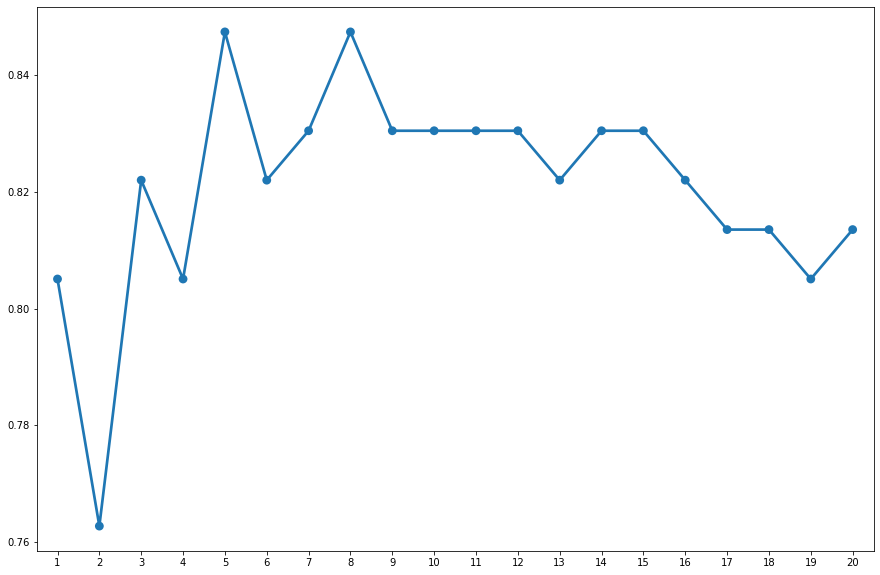

In [28]:
plt.figure(figsize=(15,10))
sns.pointplot(nbr_range,accuracy_scores)

In [29]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [30]:
knn_pred = knn.predict(X_test)
knn_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [31]:
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))

[[51  5]
 [17 45]]
              precision    recall  f1-score   support

           0       0.75      0.91      0.82        56
           1       0.90      0.73      0.80        62

    accuracy                           0.81       118
   macro avg       0.82      0.82      0.81       118
weighted avg       0.83      0.81      0.81       118



In [32]:
svm = SVC(random_state=1234)
svm.fit(X_train,y_train)

SVC(random_state=1234)

In [33]:
svm_pred = svm.predict(X_test)
svm_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

In [34]:
print(confusion_matrix(y_test,svm_pred))
print(classification_report(y_test,svm_pred))

[[48  8]
 [15 47]]
              precision    recall  f1-score   support

           0       0.76      0.86      0.81        56
           1       0.85      0.76      0.80        62

    accuracy                           0.81       118
   macro avg       0.81      0.81      0.81       118
weighted avg       0.81      0.81      0.80       118



In [35]:
dtree = DecisionTreeClassifier(random_state=1234)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1234)

In [36]:
dtree_pred = dtree.predict(X_test)
dtree_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1], dtype=int64)

In [37]:
print(confusion_matrix(y_test,dtree_pred))
print(classification_report(y_test,dtree_pred))

[[45 11]
 [10 52]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        56
           1       0.83      0.84      0.83        62

    accuracy                           0.82       118
   macro avg       0.82      0.82      0.82       118
weighted avg       0.82      0.82      0.82       118



In [38]:
no_of_estimators = np.arange(100,1100,100)
accuracy_scores = []

for i in no_of_estimators:
    rfc = RandomForestClassifier(n_estimators=i,random_state=1234)
    rfc.fit(X_train,y_train)
    rfc_pred = rfc.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test,rfc_pred))

Text(0.5, 1.0, 'Variation of accuracy scores according to no. of estimators')

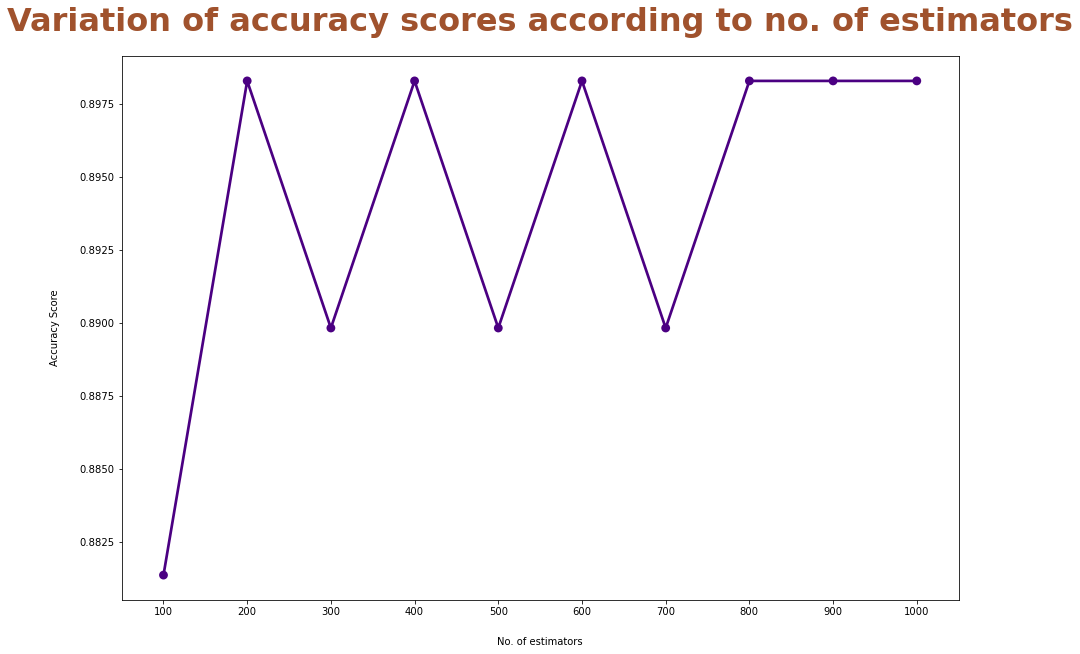

In [39]:
plt.figure(figsize=(15,10))
sns.pointplot(no_of_estimators,accuracy_scores,color='indigo')
plt.xlabel('No. of estimators',labelpad=20)
plt.ylabel('Accuracy Score',labelpad=20)
plt.title('Variation of accuracy scores according to no. of estimators',fontsize=32,color='sienna',fontweight='bold',pad=25)

In [40]:
rfc = RandomForestClassifier(n_estimators=200,random_state=1234)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=1234)

In [41]:
rfc_pred = rfc.predict(X_test)
rfc_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

In [42]:
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[54  2]
 [10 52]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90        56
           1       0.96      0.84      0.90        62

    accuracy                           0.90       118
   macro avg       0.90      0.90      0.90       118
weighted avg       0.91      0.90      0.90       118



In [43]:
xgb = XGBClassifier(random_state=1234)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1234, reg_alpha=0, reg_lambda=1, ...)

In [44]:
xgb_pred = xgb.predict(X_test)
xgb_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1])

In [45]:
print(confusion_matrix(y_test,xgb_pred))
print(classification_report(y_test,xgb_pred))

[[54  2]
 [12 50]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.89        56
           1       0.96      0.81      0.88        62

    accuracy                           0.88       118
   macro avg       0.89      0.89      0.88       118
weighted avg       0.89      0.88      0.88       118



In [46]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [47]:
gnb_pred = gnb.predict(X_test)
gnb_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

In [48]:
print(confusion_matrix(y_test,gnb_pred))
print(classification_report(y_test,gnb_pred))

[[56  0]
 [15 47]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        56
           1       1.00      0.76      0.86        62

    accuracy                           0.87       118
   macro avg       0.89      0.88      0.87       118
weighted avg       0.90      0.87      0.87       118



In [49]:
param_grid = {'C': [1,10,100,1000,10000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [50]:
grid_search = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.889, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.857, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.771, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.800, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.771, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.889, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.857, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.800, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.800, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.743, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.889, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.857, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.771, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .

[CV] .... C=10000, gamma=0.001, kernel=rbf, score=0.861, total=   0.0s
[CV] C=10000, gamma=0.001, kernel=rbf ................................
[CV] .... C=10000, gamma=0.001, kernel=rbf, score=0.829, total=   0.0s
[CV] C=10000, gamma=0.001, kernel=rbf ................................
[CV] .... C=10000, gamma=0.001, kernel=rbf, score=0.800, total=   0.0s
[CV] C=10000, gamma=0.001, kernel=rbf ................................
[CV] .... C=10000, gamma=0.001, kernel=rbf, score=0.714, total=   0.0s
[CV] C=10000, gamma=0.001, kernel=rbf ................................
[CV] .... C=10000, gamma=0.001, kernel=rbf, score=0.800, total=   0.0s
[CV] C=10000, gamma=0.0001, kernel=rbf ...............................
[CV] ... C=10000, gamma=0.0001, kernel=rbf, score=0.889, total=   0.0s
[CV] C=10000, gamma=0.0001, kernel=rbf ...............................
[CV] ... C=10000, gamma=0.0001, kernel=rbf, score=0.857, total=   0.0s
[CV] C=10000, gamma=0.0001, kernel=rbf ...............................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.4s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000, 10000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=4)

In [51]:
grid_search.best_estimator_

SVC(C=10000, gamma=1)

In [52]:
grid_search.best_score_

0.8407936507936509

In [53]:
optimised_svm_pred = grid_search.predict(X_test)
optimised_svm_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [54]:
print(confusion_matrix(y_test,optimised_svm_pred))
print(classification_report(y_test,optimised_svm_pred))

[[55  1]
 [12 50]]
              precision    recall  f1-score   support

           0       0.82      0.98      0.89        56
           1       0.98      0.81      0.88        62

    accuracy                           0.89       118
   macro avg       0.90      0.89      0.89       118
weighted avg       0.90      0.89      0.89       118



In [55]:
param_grid = {'criterion': ["gini", "entropy"],
              'splitter': ["best", "random"],
              'max_depth': [5,10,15,20,25],
              'max_features': ['auto','sqrt','log2']
             }

In [56]:
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=1234),param_grid,refit=True,verbose=3)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] criterion=gini, max_depth=5, max_features=auto, splitter=best ...
[CV]  criterion=gini, max_depth=5, max_features=auto, splitter=best, score=0.861, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=auto, splitter=best ...
[CV]  criterion=gini, max_depth=5, max_features=auto, splitter=best, score=0.857, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=auto, splitter=best ...
[CV]  criterion=gini, max_depth=5, max_features=auto, splitter=best, score=0.743, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=auto, splitter=best ...
[CV]  criterion=gini, max_depth=5, max_features=auto, splitter=best, score=0.771, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=auto, splitter=best ...
[CV]  criterion=gini, max_depth=5, max_features=auto, splitter=best, score=0.686, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=auto, splitter=random .
[CV]  criterion=gini, max_depth=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=5, max_features=sqrt, splitter=best, score=0.857, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=sqrt, splitter=best ...
[CV]  criterion=gini, max_depth=5, max_features=sqrt, splitter=best, score=0.743, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=sqrt, splitter=best ...
[CV]  criterion=gini, max_depth=5, max_features=sqrt, splitter=best, score=0.771, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=sqrt, splitter=best ...
[CV]  criterion=gini, max_depth=5, max_features=sqrt, splitter=best, score=0.686, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=sqrt, splitter=random .
[CV]  criterion=gini, max_depth=5, max_features=sqrt, splitter=random, score=0.889, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=sqrt, splitter=random .
[CV]  criterion=gini, max_depth=5, max_features=sqrt, splitter=random, score=0.886, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=sqrt, splitter=ran

[CV]  criterion=gini, max_depth=15, max_features=auto, splitter=random, score=0.833, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=auto, splitter=random 
[CV]  criterion=gini, max_depth=15, max_features=auto, splitter=random, score=0.714, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=auto, splitter=random 
[CV]  criterion=gini, max_depth=15, max_features=auto, splitter=random, score=0.829, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=auto, splitter=random 
[CV]  criterion=gini, max_depth=15, max_features=auto, splitter=random, score=0.857, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=auto, splitter=random 
[CV]  criterion=gini, max_depth=15, max_features=auto, splitter=random, score=0.829, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=sqrt, splitter=best ..
[CV]  criterion=gini, max_depth=15, max_features=sqrt, splitter=best, score=0.944, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=sqrt,

[CV]  criterion=gini, max_depth=25, max_features=auto, splitter=best, score=0.657, total=   0.0s
[CV] criterion=gini, max_depth=25, max_features=auto, splitter=random 
[CV]  criterion=gini, max_depth=25, max_features=auto, splitter=random, score=0.833, total=   0.0s
[CV] criterion=gini, max_depth=25, max_features=auto, splitter=random 
[CV]  criterion=gini, max_depth=25, max_features=auto, splitter=random, score=0.771, total=   0.0s
[CV] criterion=gini, max_depth=25, max_features=auto, splitter=random 
[CV]  criterion=gini, max_depth=25, max_features=auto, splitter=random, score=0.829, total=   0.0s
[CV] criterion=gini, max_depth=25, max_features=auto, splitter=random 
[CV]  criterion=gini, max_depth=25, max_features=auto, splitter=random, score=0.914, total=   0.0s
[CV] criterion=gini, max_depth=25, max_features=auto, splitter=random 
[CV]  criterion=gini, max_depth=25, max_features=auto, splitter=random, score=0.829, total=   0.0s
[CV] criterion=gini, max_depth=25, max_features=sqrt,

[CV]  criterion=entropy, max_depth=10, max_features=sqrt, splitter=best, score=0.917, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=sqrt, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=sqrt, splitter=best, score=0.829, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=sqrt, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=sqrt, splitter=best, score=0.886, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=sqrt, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=sqrt, splitter=best, score=0.771, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=sqrt, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=sqrt, splitter=best, score=0.771, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=sqrt, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=sqrt, splitter=random, score=0.889, total=   0.0s
[CV] criterion=entropy, max_depth=10

[CV]  criterion=entropy, max_depth=20, max_features=log2, splitter=random, score=0.829, total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=log2, splitter=random 
[CV]  criterion=entropy, max_depth=20, max_features=log2, splitter=random, score=0.914, total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=log2, splitter=random 
[CV]  criterion=entropy, max_depth=20, max_features=log2, splitter=random, score=0.829, total=   0.0s
[CV] criterion=entropy, max_depth=25, max_features=auto, splitter=best 
[CV]  criterion=entropy, max_depth=25, max_features=auto, splitter=best, score=0.917, total=   0.0s
[CV] criterion=entropy, max_depth=25, max_features=auto, splitter=best 
[CV]  criterion=entropy, max_depth=25, max_features=auto, splitter=best, score=0.829, total=   0.0s
[CV] criterion=entropy, max_depth=25, max_features=auto, splitter=best 
[CV]  criterion=entropy, max_depth=25, max_features=auto, splitter=best, score=0.886, total=   0.0s
[CV] criterion=entropy, max_de

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.7s finished


GridSearchCV(estimator=DecisionTreeClassifier(random_state=1234),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             verbose=3)

In [57]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=10, max_features='auto', random_state=1234,
                       splitter='random')

In [58]:
grid_search.best_score_

0.8463492063492064

In [59]:
optimised_dtree_pred = grid_search.predict(X_test)
optimised_dtree_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1], dtype=int64)

In [60]:
print(confusion_matrix(y_test,optimised_dtree_pred))
print(classification_report(y_test,optimised_dtree_pred))

[[51  5]
 [16 46]]
              precision    recall  f1-score   support

           0       0.76      0.91      0.83        56
           1       0.90      0.74      0.81        62

    accuracy                           0.82       118
   macro avg       0.83      0.83      0.82       118
weighted avg       0.84      0.82      0.82       118



In [61]:
param_grid = {
    'n_estimators': [100,500,700,900],
    'criterion': ['gini','entropy'],
    'max_features': ['auto','sqrt','log2'],
    'oob_score': [True,False],
    'class_weight': ['balanced','balanced_subsample']}

In [62]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=1234),param_grid,refit=True,verbose=4)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=100, oob_score=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=100, oob_score=True, score=0.944, total=   0.2s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=100, oob_score=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=100, oob_score=True, score=0.886, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=100, oob_score=True 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=100, oob_score=True, score=0.800, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=100, oob_score=True 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=100, oob_score=True, score=0.857, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=100, oob_score=True 
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=100, oob_score=True, score=0.800, total=   0.2s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=100, oob_score=False 
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=100, oob_score=False, score=0.944, total=   0.2s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=100, oob_score=False 
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=100, oob_score=False, score=0.886, total=   0.2s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=100, oob_score=False 
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=100, oob_score=False, score=0.

[CV]  class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=100, oob_score=True, score=0.886, total=   0.2s
[CV] class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=100, oob_score=True 
[CV]  class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=100, oob_score=True, score=0.800, total=   0.2s
[CV] class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=100, oob_score=True 
[CV]  class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=100, oob_score=True, score=0.857, total=   0.2s
[CV] class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=100, oob_score=True 
[CV]  class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=100, oob_score=True, score=0.800, total=   0.2s
[CV] class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=100, oob_score=False 
[CV]  class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=100, oob_score=False, score=0.944,

[CV]  class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=900, oob_score=False, score=0.857, total=   1.4s
[CV] class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=900, oob_score=False 
[CV]  class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=900, oob_score=False, score=0.800, total=   1.2s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=100, oob_score=True 
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=100, oob_score=True, score=0.944, total=   0.2s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=100, oob_score=True 
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=100, oob_score=True, score=0.886, total=   0.2s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=100, oob_score=True 
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=100, oob_score=True, score=0.800

[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=900, oob_score=False, score=0.917, total=   1.4s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=900, oob_score=False 
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=900, oob_score=False, score=0.857, total=   1.3s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=900, oob_score=False 
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=900, oob_score=False, score=0.800, total=   1.3s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=900, oob_score=False 
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=900, oob_score=False, score=0.857, total=   1.6s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=900, oob_score=False 
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=900, oob_score=False, score

[CV]  class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=900, oob_score=True, score=0.857, total=   1.8s
[CV] class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=900, oob_score=True 
[CV]  class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=900, oob_score=True, score=0.800, total=   1.9s
[CV] class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=900, oob_score=True 
[CV]  class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=900, oob_score=True, score=0.857, total=   1.7s
[CV] class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=900, oob_score=True 
[CV]  class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=900, oob_score=True, score=0.800, total=   1.7s
[CV] class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=900, oob_score=False 
[CV]  class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=900, oo

[CV]  class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=700, oob_score=False, score=0.800, total=   1.7s
[CV] class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=700, oob_score=False 
[CV]  class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=700, oob_score=False, score=0.857, total=   1.7s
[CV] class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=700, oob_score=False 
[CV]  class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=700, oob_score=False, score=0.800, total=   1.9s
[CV] class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=900, oob_score=True 
[CV]  class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=900, oob_score=True, score=0.861, total=   2.8s
[CV] class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=900, oob_score=True 
[CV]  class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=900

[CV]  class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=700, oob_score=True, score=0.857, total=   2.1s
[CV] class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=700, oob_score=True 
[CV]  class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=700, oob_score=True, score=0.800, total=   2.1s
[CV] class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=700, oob_score=False 
[CV]  class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=700, oob_score=False, score=0.889, total=   1.8s
[CV] class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=700, oob_score=False 
[CV]  class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=700, oob_score=False, score=0.886, total=   1.7s
[CV] class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=700, oob_score=False 
[CV]  class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=700

[CV]  class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=500, oob_score=False, score=0.857, total=   2.3s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=500, oob_score=False 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=500, oob_score=False, score=0.800, total=   1.9s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=700, oob_score=True 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=700, oob_score=True, score=0.917, total=   3.3s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=700, oob_score=True 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=700, oob_score=True, score=0.857, total=   3.3s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=700, oob_score=True 
[CV]  class_weight=balanced_s

[CV]  class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=500, oob_score=True, score=0.800, total=   1.3s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=500, oob_score=True 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=500, oob_score=True, score=0.857, total=   1.3s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=500, oob_score=True 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=500, oob_score=True, score=0.800, total=   1.0s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=500, oob_score=False 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=500, oob_score=False, score=0.917, total=   0.8s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=500, oob_score=False 
[CV]  class_weight=balanced_s

[CV]  class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=100, oob_score=False, score=0.886, total=   0.2s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=100, oob_score=False 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=100, oob_score=False, score=0.800, total=   0.2s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=100, oob_score=False 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=100, oob_score=False, score=0.857, total=   0.2s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=100, oob_score=False 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=100, oob_score=False, score=0.829, total=   0.2s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=500, oob_score=True 
[CV]  class_weight=balanc

[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=100, oob_score=True, score=0.861, total=   0.3s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=100, oob_score=True 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=100, oob_score=True, score=0.857, total=   0.2s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=100, oob_score=True 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=100, oob_score=True, score=0.800, total=   0.2s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=100, oob_score=True 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=100, oob_score=True, score=0.857, total=   0.3s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=100, oob_score=True 
[CV]  cl

[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=900, oob_score=True, score=0.857, total=   2.1s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=900, oob_score=True 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=900, oob_score=True, score=0.800, total=   2.2s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=900, oob_score=False 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=900, oob_score=False, score=0.889, total=   1.6s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=900, oob_score=False 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=900, oob_score=False, score=0.886, total=   1.7s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=900, oob_score=False 
[CV

[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=700, oob_score=False, score=0.886, total=   1.3s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=700, oob_score=False 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=700, oob_score=False, score=0.800, total=   1.7s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=700, oob_score=False 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=700, oob_score=False, score=0.857, total=   1.2s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=700, oob_score=False 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=700, oob_score=False, score=0.800, total=   1.2s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=900, oob_score=True 
[

[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=500, oob_score=False, score=0.800, total=   1.1s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=700, oob_score=True 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=700, oob_score=True, score=0.889, total=   1.5s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=700, oob_score=True 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=700, oob_score=True, score=0.886, total=   2.8s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=700, oob_score=True 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=700, oob_score=True, score=0.800, total=   1.4s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=700, oob_score=True 
[CV]  c

[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed: 10.5min finished


GridSearchCV(estimator=RandomForestClassifier(random_state=1234),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 500, 700, 900],
                         'oob_score': [True, False]},
             verbose=4)

In [63]:
grid_search.best_score_

0.8576190476190476

In [64]:
rfc = RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy', max_features='log2', n_estimators=500, oob_score=True, random_state=60)
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_features='log2', n_estimators=500, oob_score=True,
                       random_state=60)

In [65]:
optimised_rfc_pred = rfc.predict(X_test)
optimised_rfc_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

In [66]:
print(confusion_matrix(y_test,optimised_rfc_pred))
print(classification_report(y_test,optimised_rfc_pred))

[[53  3]
 [10 52]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89        56
           1       0.95      0.84      0.89        62

    accuracy                           0.89       118
   macro avg       0.89      0.89      0.89       118
weighted avg       0.90      0.89      0.89       118



## Conclusion

In [67]:
print("Performance of all ML models used:")
print("Accuracy Score of Logistic Regression:",str(np.round(accuracy_score(y_test,lr_pred)*100,2)) + '%')
print("Accuracy Score of K Neighbors Classifier:",str(np.round(accuracy_score(y_test,knn_pred)*100,2)) + '%')
print("Accuracy Score of Support Vector Classifier:",str(np.round(accuracy_score(y_test,optimised_svm_pred)*100,2)) + '%')
print("Accuracy Score of Decision Tree Classifier:",str(np.round(accuracy_score(y_test,optimised_dtree_pred)*100,2)) + '%')
print("Accuracy Score of Random Forest Classifier:",str(np.round(accuracy_score(y_test,optimised_rfc_pred)*100,2)) + '%')
print("Accuracy Score of Gaussian Naive Bayes:",str(np.round(accuracy_score(y_test,gnb_pred)*100,2)) + '%')
print("Accuracy Score of XG Boost Classifier:",str(np.round(accuracy_score(y_test,xgb_pred)*100,2)) + '%')

Performance of all ML models used:
Accuracy Score of Logistic Regression: 80.51%
Accuracy Score of K Neighbors Classifier: 81.36%
Accuracy Score of Support Vector Classifier: 88.98%
Accuracy Score of Decision Tree Classifier: 82.2%
Accuracy Score of Random Forest Classifier: 88.98%
Accuracy Score of Gaussian Naive Bayes: 87.29%
Accuracy Score of XG Boost Classifier: 88.14%


### Random Forest Classifier predicted the Parkinson's disease to the highest accuracy level, even though, Logistic Regression had the worst performance among all models.

## Saving the model

In [68]:
joblib.dump(rfc,'model.pkl')

['model.pkl']

In [69]:
joblib.load('model.pkl')

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_features='log2', n_estimators=500, oob_score=True,
                       random_state=60)